# Zero Crossing Rate & Cleaning Audio Data Pipeline

Author: Sylas Chacko, Omari Motta, Ashley Chen

In [1]:
# Importing Packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wave
import soundfile as sf
from glob import glob
import pickle
import librosa 
import librosa.display
import IPython.display as ipd
from itertools import cycle
import shutil



### TESS Dataset Preprocessing

First step is to move all the audio files into one folder.

In [3]:
def move_files(source_folders, destination_folder):

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)


    for folder in source_folders:

        for filename in os.listdir(folder):
            source_path = os.path.join(folder, filename)
            

            if os.path.isfile(source_path):
                destination_path = os.path.join(destination_folder, filename)
                

                shutil.move(source_path, destination_path)
                print(f'Moved: {source_path} -> {destination_path}')


source_folders = [r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_angry',
                   r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_disgust',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_Fear',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_happy',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_neutral',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_Pleasant_surprise',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_Sad',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\YAF_angry',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\YAF_disgust',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\YAF_fear',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\YAF_happy',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\YAF_neutral',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\YAF_pleasant_surprised',
                     r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\YAF_sad']  
destination_folder = r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio'  


move_files(source_folders, destination_folder)


Moved: C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav -> C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio\OAF_back_angry.wav
Moved: C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav -> C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio\OAF_bar_angry.wav
Moved: C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav -> C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio\OAF_base_angry.wav
Moved: C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav -> C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio\OAF_bath_angry.wav
Moved: C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav -> C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio\O

In [4]:
# Audio File Information

directory = r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio'

for file_name in os.listdir(directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory, file_name)
        with sf.SoundFile(file_path) as sound_file:
            print(f'Filename: {file_name}')
            print('Sample rate:', sound_file.samplerate)
            print('Channels:', sound_file.channels)
            print('Subtype:', sound_file.subtype)

Filename: OAF_back_angry.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_back_disgust.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_back_fear.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_back_happy.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_back_neutral.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_back_ps.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_back_sad.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_bar_angry.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_bar_disgust.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_bar_fear.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_bar_happy.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_bar_neutral.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_bar_ps.wav
Sample rate: 24414
Channels: 1
Subtype: PCM_16
Filename: OAF_bar_sa

In [5]:
# Checking for corrupted files
for file_name in os.listdir(directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory, file_name)
        try:
            with sf.SoundFile(file_path) as sound_file:
                print(file_name, "is OK")
        except Exception as e:
            print(file_name, "is corrupted or unreadable:", str(e))


OAF_back_angry.wav is OK
OAF_back_disgust.wav is OK
OAF_back_fear.wav is OK
OAF_back_happy.wav is OK
OAF_back_neutral.wav is OK
OAF_back_ps.wav is OK
OAF_back_sad.wav is OK
OAF_bar_angry.wav is OK
OAF_bar_disgust.wav is OK
OAF_bar_fear.wav is OK
OAF_bar_happy.wav is OK
OAF_bar_neutral.wav is OK
OAF_bar_ps.wav is OK
OAF_bar_sad.wav is OK
OAF_base_angry.wav is OK
OAF_base_disgust.wav is OK
OAF_base_fear.wav is OK
OAF_base_happy.wav is OK
OAF_base_neutral.wav is OK
OAF_base_ps.wav is OK
OAF_base_sad.wav is OK
OAF_bath_angry.wav is OK
OAF_bath_disgust.wav is OK
OAF_bath_fear.wav is OK
OAF_bath_happy.wav is OK
OAF_bath_neutral.wav is OK
OAF_bath_ps.wav is OK
OAF_bath_sad.wav is OK
OAF_bean_angry.wav is OK
OAF_bean_disgust.wav is OK
OAF_bean_fear.wav is OK
OAF_bean_happy.wav is OK
OAF_bean_neutral.wav is OK
OAF_bean_ps.wav is OK
OAF_bean_sad.wav is OK
OAF_beg_angry.wav is OK
OAF_beg_disgust.wav is OK
OAF_beg_fear.wav is OK
OAF_beg_happy.wav is OK
OAF_beg_neutral.wav is OK
OAF_beg_ps.wav is O

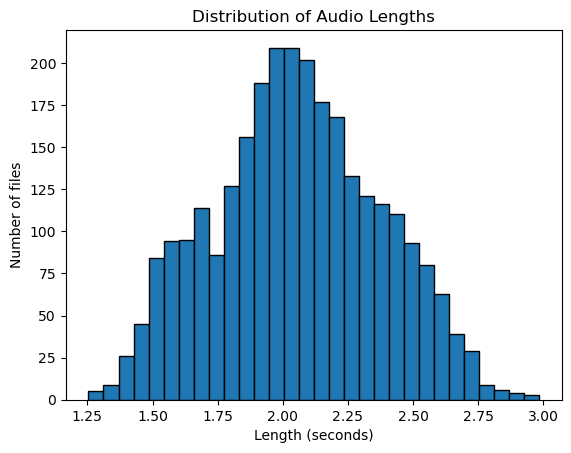

In [6]:
lengths = []
for file_name in os.listdir(directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory, file_name)
        audio, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=audio, sr=sr)
        lengths.append(duration)

# Plotting
plt.hist(lengths, bins=30, edgecolor='black')
plt.title('Distribution of Audio Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Number of files')
plt.show()

In [7]:
## Calculating desired audio length
lengths_samples = []  # To store the number of samples of each file
lengths_seconds = []  # To store the duration in seconds of each file

# Load all audio files and calculate lengths
for file_name in os.listdir(directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory, file_name)
        audio, sr = librosa.load(file_path, sr=None)
        original_length = len(audio)
        duration_seconds = original_length / sr
        
        lengths_samples.append(original_length)
        lengths_seconds.append(duration_seconds)

# Convert lists to numpy arrays for easier manipulation
lengths_samples = np.array(lengths_samples)
lengths_seconds = np.array(lengths_seconds)

# Initial analysis to determine mean and standard deviation
mean_samples = np.mean(lengths_samples)
std_samples = np.std(lengths_samples)
mean_seconds = np.mean(lengths_seconds)
std_seconds = np.std(lengths_seconds)

# Define outliers as being more than 2 standard deviations from the mean
outlier_samples = (lengths_samples < mean_samples - 2 * std_samples) | (lengths_samples > mean_samples + 2 * std_samples)
outlier_seconds = (lengths_seconds < mean_seconds - 2 * std_seconds) | (lengths_seconds > mean_seconds + 2 * std_seconds)

# Filter out the outliers
filtered_samples = lengths_samples[~outlier_samples]
filtered_seconds = lengths_seconds[~outlier_seconds]

# Recalculate the averages without outliers
average_length_samples_filtered = np.mean(filtered_samples)
average_length_seconds_filtered = np.mean(filtered_seconds)

print(f"Average length in samples without outliers: {average_length_samples_filtered}")
print(f"Average length in seconds without outliers: {average_length_seconds_filtered}")


Average length in samples without outliers: 50119.79612005856
Average length in seconds without outliers: 2.050057290673203


In [8]:
# Define the directory where the audio files are stored
directory = r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio'

# Desired length in seconds
desired_length = 2.0

# Sampling rate (assuming 22050 Hz, but you can change this if different)
sampling_rate = 22050

# Define the desired number of samples (2 seconds * sampling rate)
desired_samples = int(desired_length * sampling_rate)

# Process each audio file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        file_path = os.path.join(directory, filename)
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=sampling_rate)

        if len(audio) > desired_samples:
            # Trim the audio if it's longer than the desired length
            audio = audio[:desired_samples]
        elif len(audio) < desired_samples:
            # Pad with zeros (silence) if it's shorter than the desired length
            padding = desired_samples - len(audio)
            audio = np.pad(audio, (0, padding), mode='constant')

        # Save the processed audio file using soundfile.write
        sf.write(file_path, audio, sr)

print("All files processed and standardized to 2 seconds.")


All files processed and standardized to 2 seconds.


## Feature Extraction
Zero Crossing Rate

In [12]:
def calculate_zero_crossing_rate(file_path):
    # Load the audio file
    audio, sr = librosa.load(file_path)
    
    # Calculate the zero-crossing rate
    zero_crossings = librosa.feature.zero_crossing_rate(audio)
    
    # Return the mean zero-crossing rate
    return zero_crossings.mean()

def process_wav_files(folder_path, output_csv):
    # List to store the results
    results = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .wav file
        if filename.endswith('.wav'):
            file_path = os.path.join(folder_path, filename)
            
            # Calculate zero-crossing rate
            zcr = calculate_zero_crossing_rate(file_path)
            
            # Append the result to the list
            results.append({'filename': filename, 'zero_crossing_rate': zcr})

    # Create a DataFrame from the results
    df = pd.DataFrame(results)
    
    # Save the DataFrame to a CSV file
    df.to_csv(output_csv, index=False)
    print(f'CSV file created: {output_csv}')

# Define the folder containing .wav files and the output CSV file name
folder_path = r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_Audio'  # Replace with your folder path
output_csv = 'TESS_zero_crossing_rates.csv'  # Name of the output CSV file

# Call the function to process the .wav files
process_wav_files(folder_path, output_csv)


CSV file created: TESS_zero_crossing_rates.csv


Adding emotions column to the csv file

In [13]:

csv_file = r'C:\Users\sylas\OneDrive\Projects\emo-db-project\TESS_zero_crossing_rates.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file)

# Function to extract emotion from the filename
def extract_emotion(filename):

    return filename.split('_')[-1].split('.')[0]

# Add the emotion column
df['Emotion'] = df['filename'].apply(extract_emotion)

# Save the updated DataFrame back to a CSV file
output_csv = 'TESS_zero_crossing_rates_final.csv'  # Name of the updated CSV file
df.to_csv(output_csv, index=False)

print(f'Updated CSV file created: {output_csv}')

Updated CSV file created: TESS_zero_crossing_rates_final.csv
